<a href="https://colab.research.google.com/github/SopithaManiyan/Heart_disease_prediction/blob/main/aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
'''
1.Age: Patient’s Age in years.
2.Sex: Patient’s Gender. (M = Male, F = Female)
3.ChestPainType: Chest Pain type. (4 values: ATA, NAP, ASY, TA)
4.RestingBP: resting Blood Pressure. ( in mm Hg )
5.Cholesterol: Serum Cholesterol. ( in mg/dl )
6.FastingBS: Fasting Blood Sugar > 120 mg/dl. (0 = True, 1 = False)
7.RestingECG: resting Electroencephalographic result. (values: Normal, ST, LVH)
8.MaxHR: Maximum Heart Rate achieved.
9.ExerciseAngina: Exercise induced Angina. (N = No, Y = Yes)
10.Oldpeak: ST Depression induced by Exercise relative to rest.
11.ST_Slope: Slope of the peak exercise ST segment. (values: Up, Flat, Down)
12.HeartDisease:: Heart Disease occured. (0 = No, 1 = Yes)
'''

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training


Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
from sklearn.linear_model import LogisticRegression

#convergence point

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)



LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8553719008264463


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8032786885245902


Building a Predictive System

In [ ]:
import warnings
#Example of a person not having heart diseasee
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# Example of a person having heart disease
#input_data = (35, 0, 1, 120, 200, 0, 0, 140, 0, 1.0, 0, 1, 1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning)



[0]
The Person does not have a Heart Disease


In [ ]:
'''
no diesease:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
Age: 62 years
Sex: Male
Chest Pain Type: Not mentioned
Resting Blood Pressure (RestingBP): 140 mm Hg
Serum Cholesterol (Cholesterol): 268 mg/dl
Fasting Blood Sugar (FastingBS): 0 (False), which means fasting blood sugar is not greater than 120 mg/dl
Resting Electroencephalographic Result (RestingECG): Not mentioned
Maximum Heart Rate Achieved (MaxHR): 160 bpm
Exercise Induced Angina (ExerciseAngina): Not mentioned
ST Depression Induced by Exercise Relative to Rest (Oldpeak): 3.6
Slope of the Peak Exercise ST Segment (ST_Slope): Not mentioned
Heart Disease Occurrence (HeartDisease): 0 (No)
'''

In [ ]:
'''
has diesease:
input_data = (35, 0, 1, 120, 200, 0, 0, 140, 0, 1.0, 0, 1, 1)
Age: 35 years
Sex: Male
Chest Pain Type: Typical Angina (ATA)
Resting Blood Pressure (RestingBP): 120 mm Hg
Serum Cholesterol (Cholesterol): 200 mg/dl
Fasting Blood Sugar (FastingBS): 0 (False), which means fasting blood sugar is not greater than 120 mg/dl
Resting Electroencephalographic Result (RestingECG): Normal
Maximum Heart Rate Achieved (MaxHR): 140 bpm
Exercise Induced Angina (ExerciseAngina): No
ST Depression Induced by Exercise Relative to Rest (Oldpeak): 1.0
Slope of the Peak Exercise ST Segment (ST_Slope): Up
Heart Disease Occurrence (HeartDisease): 1 (Yes)
'''

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6229508196721312


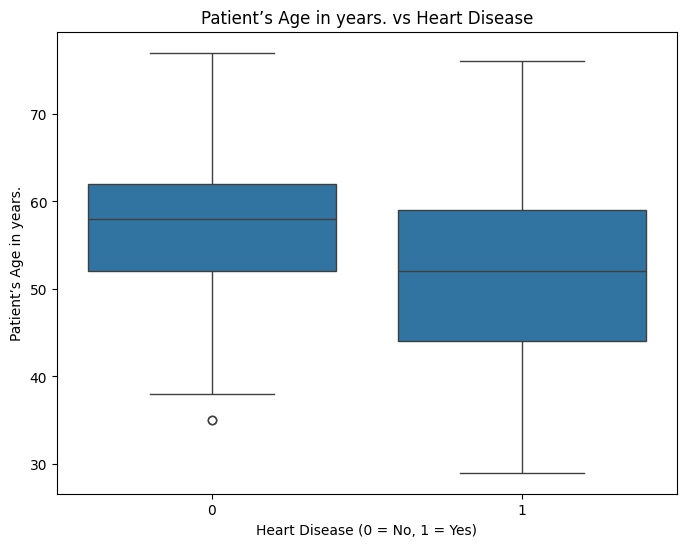

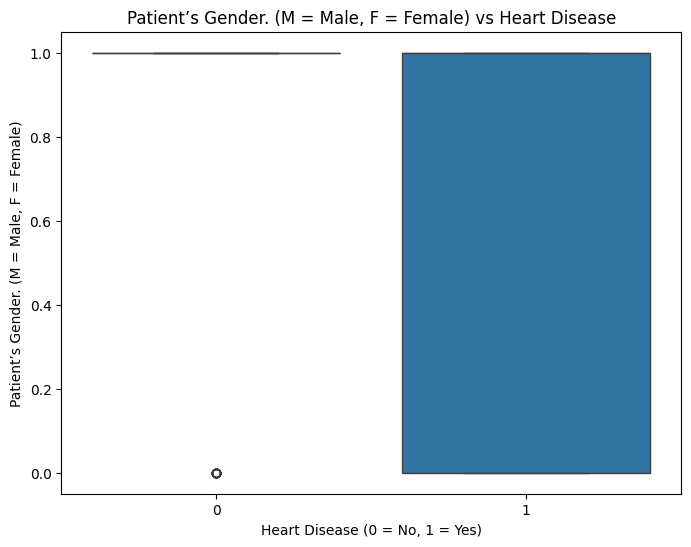

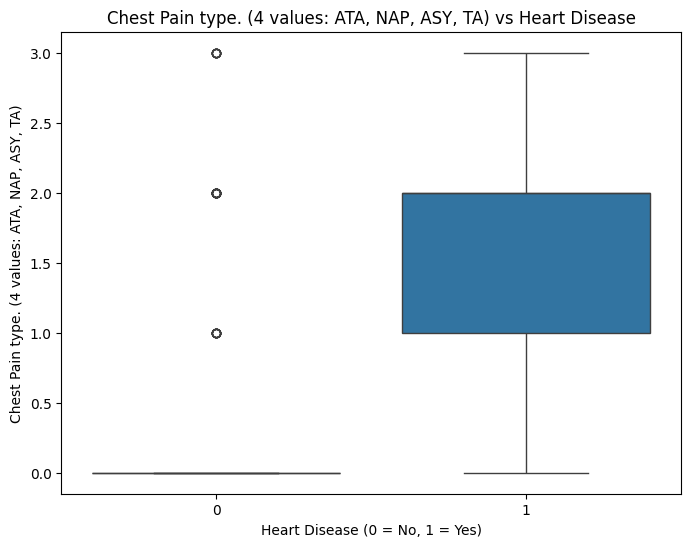

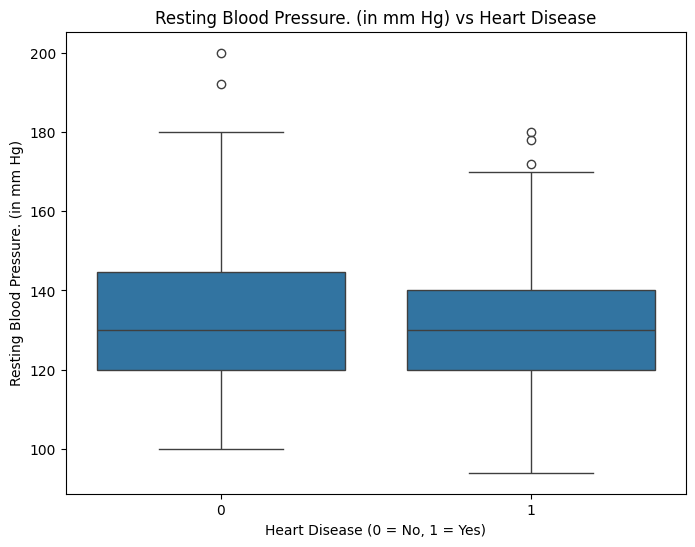

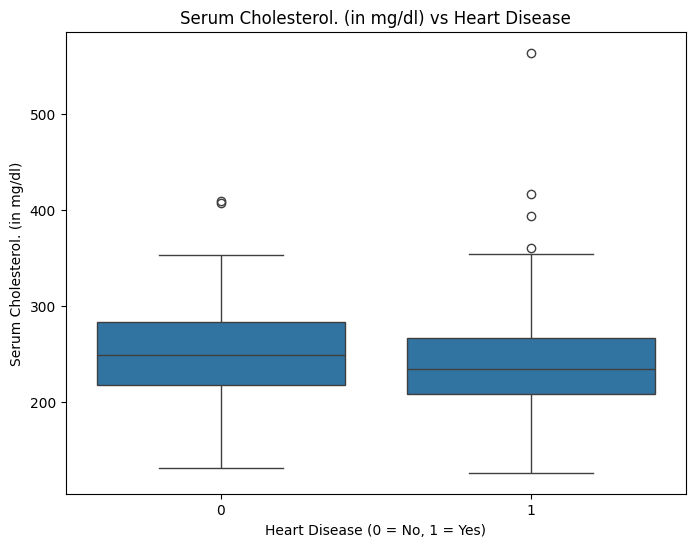

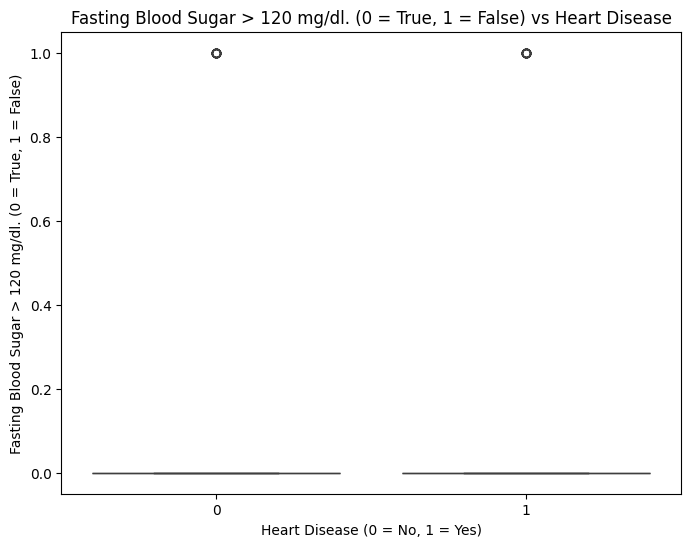

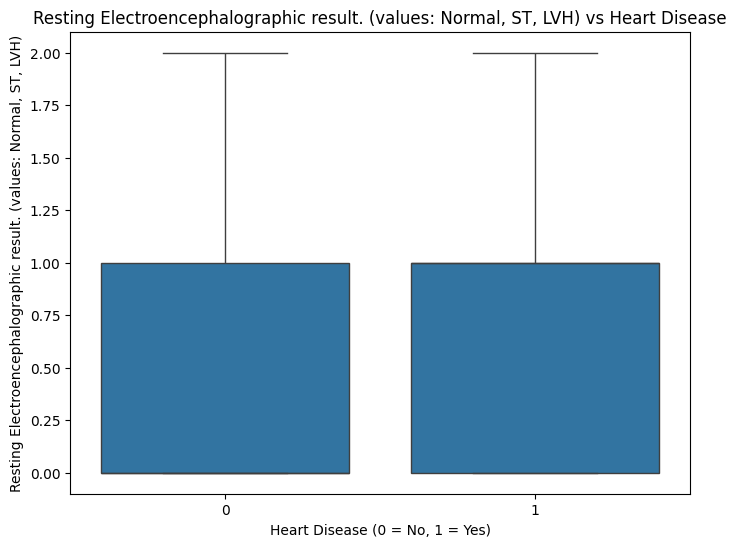

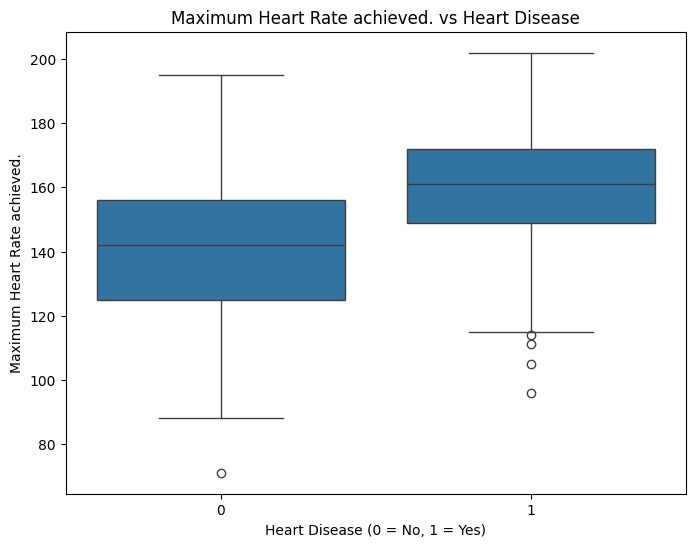

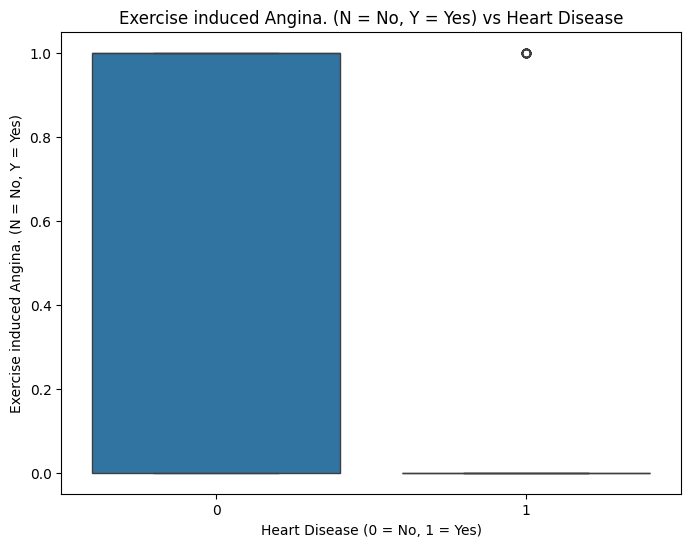

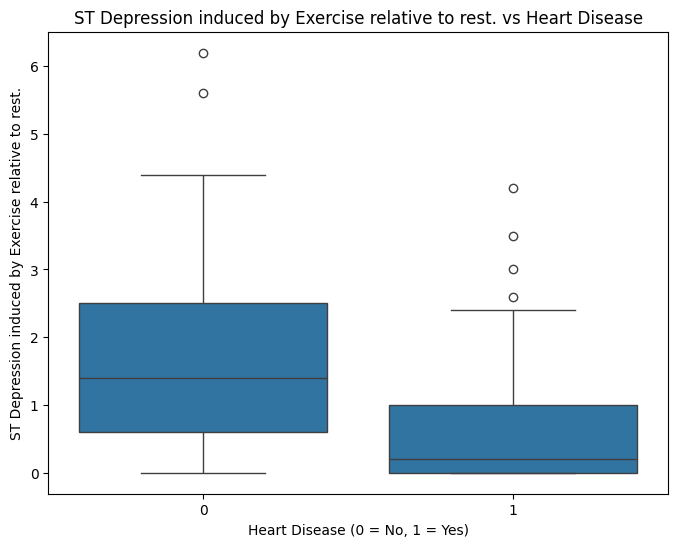

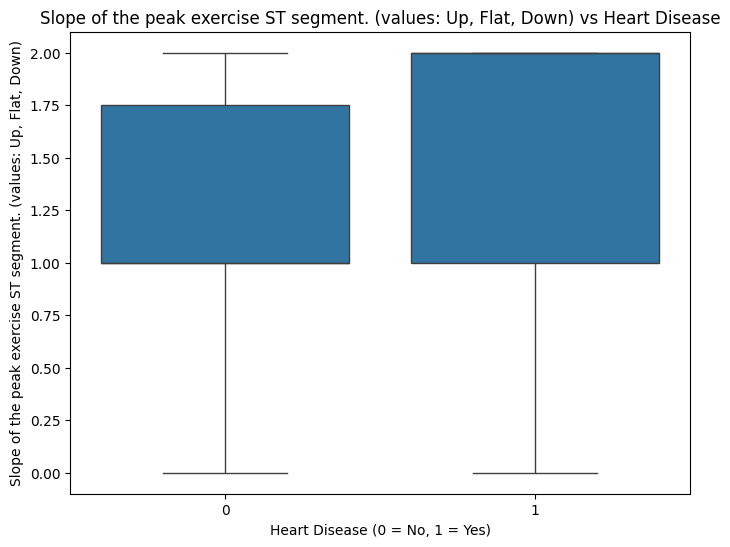

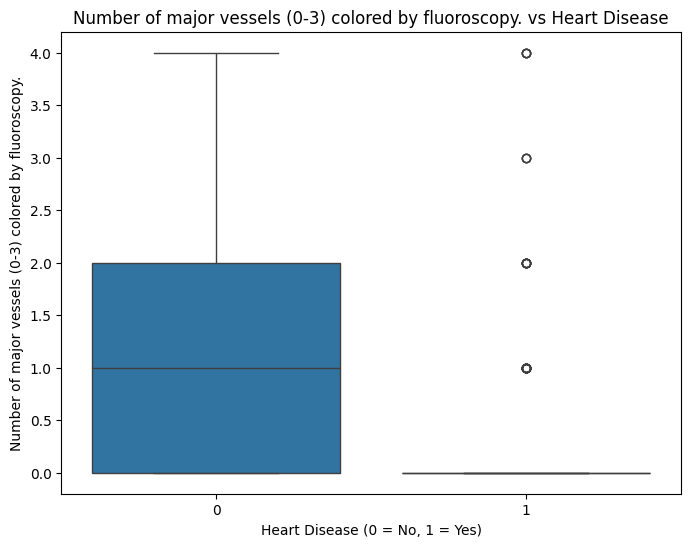

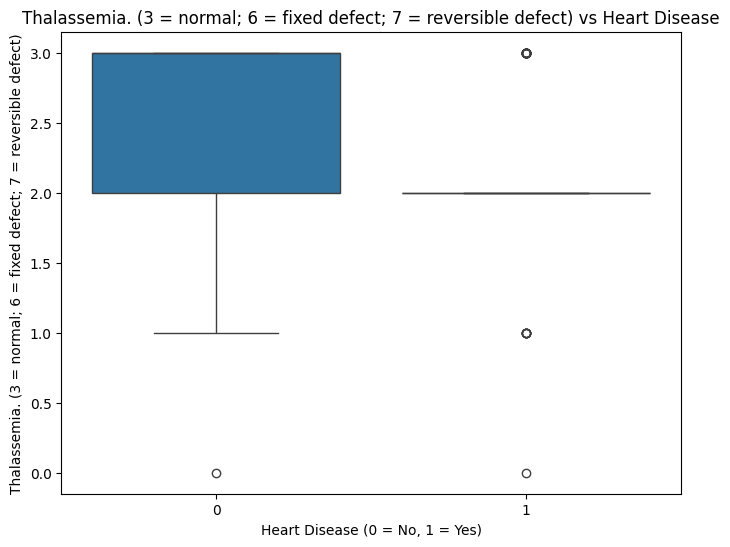

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("heart_disease_data.csv")

# Define attribute descriptions
attribute_descriptions = {
    'age': "Patient’s Age in years.",
    'sex': "Patient’s Gender. (M = Male, F = Female)",
    'cp': "Chest Pain type. (4 values: ATA, NAP, ASY, TA)",
    'trestbps': "Resting Blood Pressure. (in mm Hg)",
    'chol': "Serum Cholesterol. (in mg/dl)",
    'fbs': "Fasting Blood Sugar > 120 mg/dl. (0 = True, 1 = False)",
    'restecg': "Resting Electroencephalographic result. (values: Normal, ST, LVH)",
    'thalach': "Maximum Heart Rate achieved.",
    'exang': "Exercise induced Angina. (N = No, Y = Yes)",
    'oldpeak': "ST Depression induced by Exercise relative to rest.",
    'slope': "Slope of the peak exercise ST segment. (values: Up, Flat, Down)",
    'ca': "Number of major vessels (0-3) colored by fluoroscopy.",
    'thal': "Thalassemia. (3 = normal; 6 = fixed defect; 7 = reversible defect)",
    'target': "Heart Disease occurred. (0 = No, 1 = Yes)"
}

# Function to visualize the relationship between each attribute and heart disease
def visualize_attribute_vs_heart_disease(attribute):
    plt.figure(figsize=(8, 6))
    if df[attribute].dtype == 'object':
        sns.countplot(x=attribute, hue='target', data=df)
    else:
        sns.boxplot(x='target', y=attribute, data=df)
    plt.title(f'{attribute_descriptions[attribute]} vs Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(attribute_descriptions[attribute])
    plt.show()

# Visualize each attribute vs heart disease
for attribute in df.columns[:-1]:  # Exclude target variable
    visualize_attribute_vs_heart_disease(attribute)
